<center>

# 国家及省级碳排放核算
    
<br>
</center>
<img src='../static/img/logo.jpg' align='right' style="width:260px;height:80 px"/>


![intro.jpg](./img/插图.jpg)



> 中国提出“2030 碳达峰、2060 碳中和”的目标，描绘了全国的减排图景，而准确的二氧化碳排放核算是实现碳减排的第一步！

> 本篇依据公开资料，整理形成了国家及省级碳排放核算方法简介。

> 通过此篇，您将通过真实案例，一步步了解区域碳排放是如何计算出来的，并了解Python常用的可视化分析技巧。

📌 参考资料：
* [1] [China CO 2 emission accounts 2016–2017 | Scientific Data](https://www.nature.com/articles/s41597-020-0393-y)
* [2] [China CO 2 emission accounts 1997–2015 | Scientific Data](https://www.nature.com/articles/sdata2017201)
* [3] [CEADs 中国碳核算数据库](https://www.ceads.net.cn/)
* [4] [https://data.stats.gov.cn/easyquery.htm?cn=E0103](https://data.stats.gov.cn/easyquery.htm?cn=E0103)
* [5] 潘栋. 中国省域能源碳排放影响因素分析及预测研究[D].北京林业大学,2020.

## 核算方法简介

国家及省级碳排放核算参照IPCC核算指南，需要了解以下几个概念：
* IPCC核算边界（IPCC Accounting Scope）
* 按部门核算方法（Sectoral Approach）
* 表观排放量核算法（Reference Approach）

### IPCC核算边界

IPCC核算范围包括三个：
* <span class="mark">“范围一”排放</span>：国家/区域地理边界内发生的直接排放，例如能源消耗、产品和服务的生产和居民消费，以及农业、林业和废物的排放。
* <span class="mark">“范围二”排放</span>：国家/区域地理边界内的活动消耗的调入电力和热力（包括热水和蒸汽）相关的间接排放。
* <span class="mark">“范围三”排放</span>：除“范围二”以外的所有其他间接排放，即与国家/区域的最终消费的生产过程有关的所有其他间接排放。

![scope.png](./img/scope.png)

### 按部门核算方法

根据IPCC准则，部门二氧化碳排放量应等于部门活动水平数据（$AD$）与对应的排放因子（$EF$）的乘积，即：

$$
Emis_s = AD_s \times EF_s
$$

#### 与能源消费相关碳排放

特别地，对于与能源消费相关碳排放的计算中，$AD_{i,j,k}$ 即为区域 $i$、部门（或行业）$j$ 的燃料品种 $k$ 的燃烧量。式中的排放因子 $EF$ 可进一步表示为，燃料净热值 $NCV$（单位燃料发热量），单位热值含碳量 $CC$ 与氧化率 $O$ 的乘积，即：

$$
\begin{aligned}
Emis &= \sum \sum\sum AD_{i,j,k} \times EF_{i,j,k} \\
& = \sum \sum\sum AD_{i,j,k} \times (NCV_{i,j,k} \cdot CC_{i,j,k} \cdot O_{i,j,k}) \\
\end{aligned}
$$

#### 与工业过程相关碳排放

对于与工业过程相关碳排放的计算中，工业过程排放指工业生产过程中由于化学反应导致的二氧化碳排放，根据工业原料消耗量折算（由于化石燃料燃烧导致的碳排放已统计至“与能源消费相关碳排放中”）。根据IPCC准则，工业过程相关碳排放采用下式计算：

$$CE_t = AD_t \times EF_t$$

以水泥生产为例，其中，$CE_t$ 表示水泥生产（方解石煅烧的化学过程）中的碳排放量，$AD_t$ 为水泥产量数据，$EF_t$ 为排放因子。

### 表观排放量核算法

根据IPCC准则，表观排放量核算法是一种“自上而下”方法，其根据国家能源生产供应数据来核算由于一次化石燃料（如，原煤、原油和天然气）燃烧导致的碳排放。此方法计算过程相对直接，其基于的能源供应统计数据获取相对容易，计算结果可以作为验证按部门核算方法的依据。

$$ CE_{ref-i} = AD_{ref-i} \times EF_i $$

其中，$ CE_{ref-i}$ 为化石燃料 $i$ 的表观二氧化碳排放量，$ EF_{i}$ 和 $AD_{ref-i}$ 分别为相应化石燃料的排放因子和表观消费量。

表观碳排放量基于表观能源消费量（$AD_{ref-i}$）估算：

$AD_{ref-i}$ = 一次能源生产量 + 进口量 - 出口量 + （外省调入量 - 本省调出量）$\pm$ 库存增、减量 - 用作原料、材料非能源使用量 - 损失量

## 中国分部门核算碳排放清单构建

[CEADs 中国碳核算数据库](https://www.ceads.net.cn/) 中国各省份分部门核算碳排放清单包括，中国及其30个省份47个社会经济部门中17种化石燃料燃料及水泥生产碳排放。

* **核算边界**
	* IPCC 行政地域边界（“范围一”）
	* 能源及工业过程相关碳排放
		* 能源相关排放：17种化石燃料燃烧
		* 过程相关排放：水泥生产（<span class="burk"><span class="mark">此研究中，只统计了水泥生产过程碳排放，其占中国工业过程碳排放的70%。</span></span>）
* **方法**
	* 按部门核算方法 
* **数据源**
	* 官方统计数据
* **形式**
	* 17种化石燃料
	* 47个经济部门
    
 <span class="mark">下面，将以安徽省2017年分部门碳排放清单的构建为例，进行说明。</span>

### 数据情况

#### 数据内容

中国能源统计系统中包括26种化石燃料类型，然而，其中一些品种消耗量较少或与其他品种碳排水平类似，因而研究中对其进行了一定程度的合并，最终得到17种燃料类型，具体参见下方表格。

在合并后的17种化石燃料中，原煤、原油和天然气为一次能源，其余14种为二次能源（从一次能源中提取或处理后得到）。

|    | 能源统计中的燃料类型（中文） | 能源统计中的燃料类型（英文） | 研究中的燃料类型 （英文）  |
| -- | ---------------------------- | ----------------------------- | -------------------------- |
| 1  | 原煤                       | Raw coal                      | Raw coal                   |
| 2  | 洗精煤                    | Cleaned coal                  | Cleaned coal               |
| 3  | 其他洗煤                 | Other washed coal             | Other washed coal          |
| 4  | 煤制品                    | Briquettes                    | Briquettes                 |
|    | 煤矸石                    | Gangue                        |                            |
| 5  | 焦炭                       | Coke                          | Coke                       |
| 6  | 焦炉煤气                 | Coke oven gas                 | Coke oven gas              |
| 7  | 高炉煤气                 | Blast furnace gas             | Other gas                  |
|    | 转炉煤气                 | Converter gas                 |                            |
|    | 其他煤气                 | Other gas                     |                            |
| 8  | 其他焦化产品           | Other coking products         | Other coking products      |
| 9  | 原油                       | Crude Oil                     | Crude Oil                  |
| 10 | 汽油                       | Gasoline                      | Gasoline                   |
| 11 | 煤油                       | Kerosene                      | Kerosene                   |
| 12 | 柴油                       | Diesel oil                    | Diesel oil                 |
| 13 | 燃料油                    | Fuel oil                      | Fuel oil                   |
| 14 | 石脑油                    | Naphtha                       | Other petroleum products   |
|    | 润滑油                    | Lubricants                    |                            |
|    | 石蜡                       | Paraffin                      |                            |
|    | 溶剂油                    | White spirit                  |                            |
|    | 石油沥青                 | Bitumen asphalt               |                            |
|    | 石油焦                    | Petroleum coke                |                            |
|    | 其他石油制品           | Other petroleum products      |                            |
| 15 | 液化石油气              | Liquefied petroleum gas (LPG) | LPG                        |
| 16 | 炼厂干气                 | Refinery gas                  | Refinery gas               |
| 17 | 天然气                    | Natural gas                   | Natural gas                |

中国能源统计系统中包括47个部门，其与中国国民经济核算中的部门一致，详见下表。

| 类别         | 社会经济部门（中文）                                    | 社会经济部门（英文）                                                 |
|--------------|---------------------------------------------------------|----------------------------------------------------------------------|
| 第一产业     | 农、   林、 牧、 渔业                                   | Farming,   Forestry, Animal Husbandry, Fishery and Water Conservancy |
| 能源生产     | 煤炭开采和洗选业                                        | Coal   Mining and Dressing                                           |
| 能源生产     | 石油和天然气开采                                        | Petroleum   and Natural Gas Extraction                               |
| 能源生产     | 黑色金属矿采选业                                        | Ferrous   Metals Mining and Dressing                                 |
| 能源生产     | 有色金属矿采选业                                        | Nonferrous   Metals Mining and Dressing                              |
| 能源生产     | 非金属矿采选业                                          | Non-metal   Minerals Mining and Dressing                             |
| 能源生产     | 开采辅助活动                                            | Other   Minerals Mining and Dressing                                 |
| 轻工业       | 木材和竹子的采伐和运输                                  | Logging   and Transport of Wood and Bamboo                           |
| 轻工业       | 农副食品加工业                                          | Food   Processing                                                    |
| 轻工业       | 食品制造业                                              | Food   Production                                                    |
| 轻工业       | 酒、饮料和精制茶制造业                                  | Beverage   Production                                                |
| 轻工业       | 烟草制品业                                              | Tobacco   Processing                                                 |
| 轻工业       | 纺织业                                                  | Textile   Industry                                                   |
| 轻工业       | 纺织服装、服饰业                                        | Garments   and Other Fibre Products                                  |
| 轻工业       | 皮革、毛皮、羽毛及其制品和制鞋业                        | Leather,   Furs, Down and Related Products                           |
| 轻工业       | 木材加工和木、竹、藤、棕、草制品业                      | Timber   Processing, Bamboo, Cane, Palm Fibre & Straw Products       |
| 轻工业       | 家具制造业                                              | Furniture   Manufacturing                                            |
| 轻工业       | 造纸和纸制品业                                          | Papermaking   and Paper Products                                     |
| 轻工业       | 印刷和记录媒介复制业                                    | Printing   and Record Medium Reproduction                            |
| 轻工业       | 文教、工美、体育和娱乐用品制造业                        | Cultural,   Educational and Sports Articles                          |
| 能源生产     | 石油加工、炼焦和核燃料加工业                            | Petroleum   Processing and Coking                                    |
| 重工业       | 化学原料和化学制品制造业                                | Raw   Chemical Materials and Chemical Products                       |
| 轻工业       | 医药制造业                                              | Medical   and Pharmaceutical Products                                |
| 重工业       | 化学纤维制造业                                          | Chemical   Fibre                                                     |
| 重工业       | 橡胶和塑料制品业（橡胶）                                | Rubber   Products                                                    |
| 重工业       | 橡胶和塑料制品业（塑料）                                | Plastic   Products                                                   |
| 重工业       | 非金属矿物制品业                                        | Non-metal   Mineral Products                                         |
| 重工业       | 黑色金属冶炼和压延加工业                                | Smelting   and Pressing of Ferrous Metals                            |
| 重工业       | 有色金属冶炼和压延加工业                                | Smelting   and Pressing of Nonferrous Metals                         |
| 重工业       | 金属制品业                                              | Metal   Products                                                     |
| 重工业       | 通用设备制造业                                          | Ordinary   Machinery                                                 |
| 重工业       | 专用设备制造业                                          | Equipment   for Special Purposes                                     |
| 重工业       | 汽车制造业   & 铁路、船舶、航空航天和其他运输设备制造业 | Transportation   Equipment manufacturing                             |
| 高新技术产业 | 电气机械和器材制造业                                    | Electric   Equipment and Machinery                                   |
| 高新技术产业 | 计算机、通信和其他电子设备制造业                        | Electronic   and Telecommunications Equipment                        |
| 高新技术产业 | 仪器仪表制造业                                          | Instruments,   Meters, Cultural and Office Machinery                 |
| 高新技术产业 | 其他制造业                                              | Other   Manufacturing Industry                                       |
| 高新技术产业 | 废弃资源综合利用业                                      | Scrap   and waste                                                    |
| 能源生产     | 电力、热力生产和供应业                                  | Production   and Supply of Electric Power, Steam and Hot Water       |
| 能源生产     | 燃气生产和供应业                                        | Production   and Supply of Gas                                       |
| 重工业       | 水的生产和供应业                                        | Production   and Supply of Tap Water                                 |
| 建筑业       | 建筑业                                                  | Construction                                                         |
| 服务业       | 交通运输、   仓储和邮政业                               | Transportation,   Storage, Post and Telecommunication Services       |
| 服务业       | 批发   、 零售业和住宿、 餐饮业                         | Wholesale,   Retail Trade and Catering Services                      |
| 服务业       | 其他                                                    | Other   Service Sectors                                              |
| 生活消费     | 城镇                                                    | Urban   Resident Energy Usage                                        |
| 生活消费     | 乡村                                                    | Rural   Resident Energy Usage                                        |

#### 数据来源

由上述计算方法可知，碳排放核算主要依赖两大类数据：活动数据、排放因子数据。下面将分别介绍这两类数据的数据来源。

国家及省级活动数据，即分部门化石燃料消耗量数据，分别来自国家统计局每年发布的《中国能源统计年鉴》中的全国能源平衡表、[六、地区能源平衡表](https://data.cnki.net/trade/Yearbook/Single/N2019080025?z=Z024)。能源平衡表中包括完整的国家/地区能源流动和利用数据，包括能源生产、转化、最终消费、损失和其他。

能源平衡表中的最终能源消费仅划分为八个部门，即“农、林、牧、渔业”、“工业”、“建筑业”、“交通运输、仓储和邮政业”、“批发、零售业和住宿、餐饮业”、“其他”、“城镇生活消费”及“乡村生活消费”。研究中根据各省统计年鉴（以[《安徽统计年鉴》](http://tjj.ah.gov.cn/ssah/qwfbjd/tjnj/index.html) 为例）中“[6-18 分行业规模以上工业企业主要能源品种消费量](http://tjj.ah.gov.cn/oldfiles/tjj/tjjweb/tjnj/2018/2018.html)”表格，将能源平衡表中“工业”能源消费量按照比例折算至40个工业子部门。

国家及省级水泥产量数据分别来自《中国统计年鉴》及各省统计年鉴中。比如，以安徽省2017年为例，水泥产量数据来自《安徽统计年鉴2017》中“[13-21 主要工业产品产量](http://tjj.ah.gov.cn/oldfiles/tjj/tjjweb/tjnj/2018/2018.html)”，显示2017年安徽省水泥产量13394万吨。


| 区域       | 数据                                 | 来源                                             |
| ---------- | ------------------------------------ | ------------------------------------------------ |
| 国家（省） | 能源生产、转换、最终消费、损失及其他 | 《中国能源统计年鉴》-能源平衡表                  |
| 国家       | 八部门最终能源消费数据               | 《中国能源统计年鉴》-能源平衡表                  |
| 国家       | 工业部门最终能源消费数据             | 《中国能源统计年鉴》-工业部门能源消费表（ISECT） |
| 国家         | 水泥产量             |  《中国统计年鉴》   |
| 省       | 工业部门最终能源消费数据                    | 对应省份统计年鉴- 工业部门能源消费表（ISECT）                                 |
| 省           |   水泥产量            |   对应省份统计年鉴                                            |

#### 数据集

文章作者公布了结构化之后的排放因子数据、安徽省2017年能源数据及按照上述方法计算得到的碳排放数据，具体包括：

* 2017年安徽省47个行业部门17种化石燃料消耗数据：https://figshare.com/collections/China_CO2_emission_accounts_2016-2017/4658168
* NCV/CC数据：https://www.nature.com/articles/sdata2017201/tables/2
* Oxygenation efficiency数据：https://www.nature.com/articles/sdata2017201/tables/4
* 2017年安徽省47个行业部门二氧化碳排放数据：https://figshare.com/articles/dataset/China_provincial_CO2_emission_inventory_sectoral_approach_2016-2017/9784385?file=17538248

注：作者对 NCV、CC、Oxygenation efficiency 数据进行了更新，计算所用数据详见本文件夹中"Emission_factors.xlsx"文件。

### 读取数据

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Read emission factors and energy data from excel files

NCV = pd.read_excel('./data/Emission_factors.xlsx',sheet_name='NCV')
CC = pd.read_excel('./data/Emission_factors.xlsx',sheet_name='CC')
O = pd.read_excel('./data/Emission_factors.xlsx',sheet_name='OE', index_col=0)

Energy = pd.read_excel('./data/Province Energy inventory 2017.xlsx', sheet_name = 'Anhui2017', usecols="A:R") 
Energy.drop(labels = 0,inplace=True)
Energy.dropna(axis=  0,how='all',inplace=True) 
Energy.set_index(['Unnamed: 0'], inplace=True)

需注意，本研究只核算由于17种化石燃料消耗导致的直接CO2排放，在读取能源数据时，并未读入各部门电力和热力消耗数据。电力/热力相关碳排放已从生产端统计，记入相应的电力和热力的生产部门。

### 排放清单构建

部门能源消费既包括农业、采矿业、工业、服务业和居民消费等终端消费者的能源使用情况，也包括能源加工转化部门用于生产二次能源（如，电力、热力）而作为投入的能源使用。

In [4]:
# Convert physical energy consumption to calories

E_PJ1 = Energy.values * NCV.iloc[0,:].values

In [5]:
# recalculate the summation terms for the 47 economic sectors

E_PJ1[0,:] = E_PJ1[1:48,:].sum(axis = 0)
E_PJ2 = E_PJ1

以下部分计算“非能源使用”化石燃料消耗情况。

* 过程相关排放是指工业生产环节由于化学反应过程排放的 CO2，CO2 排放来自工业原材料，而不是化石燃料燃烧。本研究中只核算水泥生产过程排放，为避免重复计算，用作原料、材料的化石燃料（即，能源平衡表中的“非能源使用”）需从能源类化石燃料消耗量中剔除。

* 研究中认为，用作原料、材料的化石燃料主要来自“化学原料和化学制品制造业”、“医药制造业”、“化学纤维制造业”、“橡胶和塑料制品业”。计算中按照上述部门消耗各类化石燃料量将“非能源使用量”按比例折算至对应部门。

* 此外，“其他石油制品”也被认为主要用于原料、材料，需剔除。

In [6]:
####################### Remove non-energy use from the total consumption ###########################

E_NE = np.zeros(Energy.shape)

rows = Energy.index.to_list()



# non-energy use

non_energy = ['Raw Chemical Materials and Chemical Products','Medical and Pharmaceutical Products',
           'Chemical Fiber','Rubber Products','Plastic Products']

loc = np.zeros((1,len(non_energy)))
for i in range(0,len(non_energy)):
    loc[:,i] = rows.index(non_energy[i])

loc = loc.astype('int64')
totals = np.sum(E_PJ2[loc,:], axis =1)

share = np.divide(E_PJ2[loc,:], totals, out=np.zeros_like(E_PJ2[loc,:]), where=totals!=0) # 分配比例


E_NE[loc,:] = E_PJ1[rows.index('Non-Energy Use'),:] * share # 按上述分配比例计算各行业非能源使用量</div><i class="fa fa-lightbulb-o "></i>

In [7]:
# Other Petroleum Products

cols = Energy.columns.values.tolist()
loc2 = cols.index("Other Petroleum Products")
E_NE[:,loc2] = E_PJ2[:,loc2]
E_NE = np.nan_to_num(E_NE)

以下部分计算“能源加工转化”相关化石燃料消耗情况。

计算过程中，未记入非燃烧用化石燃料投入，原因在于此类过程仅伴随非常少量的CO2排放。以洗选煤过程为例，原煤中的碳元素在洗煤过程中转化为洗精煤和其他洗煤。CO2排放集中在洗精煤和其他洗煤的燃烧过程。其他类似的工艺包括炼焦、炼油及煤制油、制气和煤制品加工。

仅核算能源加工转化过程中由于化石燃料燃烧导致的碳排放，即“火力发电”、“供热”。在城市边界内由于电力/热力生产导致的碳排放基于电力/热力的能源投入量核算，并且记入“电力、热力生产和供应业”。电力/热力生产过程的能源加工转换投入产出情况统计在能源平衡表中。

In [8]:
################### Include energy combustion consumption during transformation process ###################

E_Trans = np.zeros(Energy.shape)
E_Trans[rows.index('Electric Power, Steam and Hot Water Production and Supply'),:] = \
    E_PJ1[rows.index('Thermal Power'),:] + E_PJ1[rows.index('Heating Supply'),:]

在部门终端能源消费中加上由于“境内轮船和飞机在境外的加油量”和“境外轮船和飞机在境内的加油量”，对应的能源品种为“汽油”、“煤油”、“柴油”、“燃料油”，上述能源消费统计至“交通运输、 仓储和邮政业”。

In [9]:
################### Transport-related energy combustion ###################

trans = ['Gasoline','Kerosene','Diesel Oil','Fuel Oil']
loc3 = np.zeros((1,len(trans)))
for i in range(0,len(trans)):
    loc3[:,i] = cols.index(trans[i])

loc3 = loc3.astype('int64')
E_Trans[rows.index('Transport, Storage, Postal & Telecommunications Services'),loc3] = \
    E_PJ1[rows.index('China Airplanes&ships Refueling in Abroad'),loc3] + E_PJ1[rows.index('Foreign Airplanes&ships Refueling in China'),loc3]

In [10]:
#################### Calculate the burning-energy consumption ###########

E = E_PJ2[0:48,:] - E_NE[0:48,:] + E_Trans[0:48,:]
E[0,:] = E[1:48,:].sum(axis = 0)

In [11]:
#################### Calculate the energy-related emissions ###########
CO2_E = E[1:48,:] * CC.iloc[0,:].values * O.values/100
CO2_E[CO2_E<0] = 0

In [12]:
################### Calculate the process-related emissions ############
EF_cement = 0.2906
Prod_cement = 133.94 # Prod_cement here refers to Anhui's cement production in 2017
CO2_cement = Prod_cement * EF_cement

In [13]:
##################  Construct the emission inventory #######################
#
CO2 = np.zeros((48,19))

CO2[1:48,0:17] = CO2_E
CO2[rows.index('Nonmetal Mineral Products'),-2] = CO2_cement

CO2 [:, -1] = CO2.sum(axis = 1)
CO2 [0,:] = np.sum(CO2[1:48,:], axis = 0)

CO2 = pd.DataFrame(CO2)
cols.append('Process')
cols.append('Total')
CO2.columns = cols
CO2.index = rows[0:48]

In [14]:
CO2.to_excel('./result/CO2_Anhui_2017.xlsx')

## 省级碳排放数据可视化分析

### 看数据分布

#### Pandas DataFrame自带画图功能

**直方图**

> 使用pandas DataFrame的hist()方法直接绘制：将数据划分至等长区间(bins)。用于统计数据分布在不同区间的计数值。

In [15]:
import pandas as pd

CO2 = pd.read_excel('./result/CO2_Anhui_2017.xlsx',index_col=0)

In [ ]:
CO2.dtypes

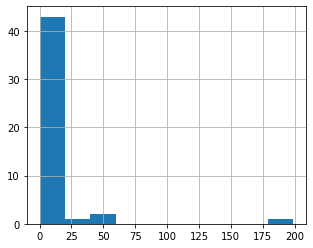

In [17]:
# 安徽省2017年行业碳排放分布

CO2.loc[CO2.index != 'Total Final Consumption','Total'].hist(figsize = (5,4))

**Kernel Density Plots**

> 看作为直方图的平滑版本

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

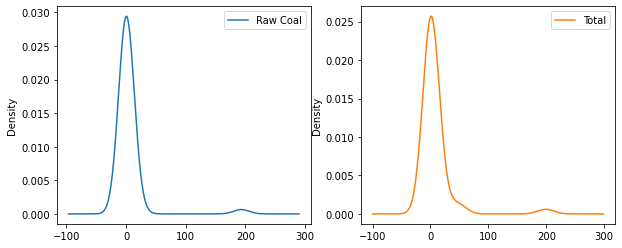

In [18]:
# 安徽省2017年行业碳排放分布

CO2.loc[CO2.index != 'Total Final Consumption',['Raw Coal','Total']].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4))

**Describe**

> 对于一维数组，describe会返回一系列参数，count，mean，std，min，25%，50%，75%，max。

In [19]:
CO2.loc[CO2.index != 'Total Final Consumption','Total'].describe()

count     47.000000
mean       7.884073
std       30.312705
min        0.000000
25%        0.042996
50%        0.161142
75%        0.877368
max      198.991628
Name: Total, dtype: float64

#### Seaborn

**kdeplot(核密度估计图)**

> 核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。

In [ ]:
!pip install seaborn

<AxesSubplot:xlabel='Total', ylabel='Density'>

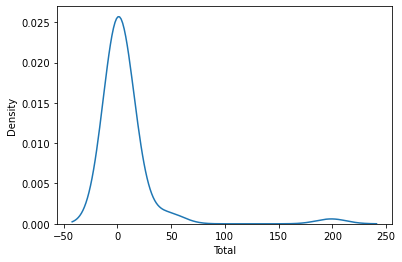

In [20]:
# 安徽省2017年行业碳排放分布

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats,integrate

x = CO2.loc[CO2.index != 'Total Final Consumption','Total']
sns.kdeplot(x)

<AxesSubplot:xlabel='Total', ylabel='Density'>

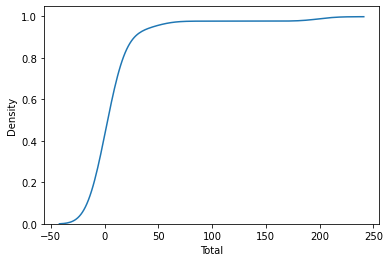

In [21]:
sns.kdeplot(x,cumulative=True)#cumulative ：是否绘制累积分布

<AxesSubplot:xlabel='Total', ylabel='Density'>

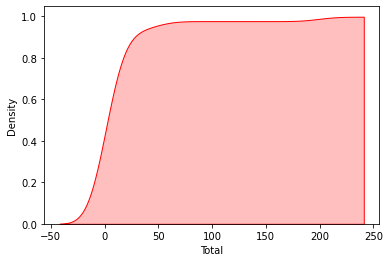

In [22]:
sns.kdeplot(x,cumulative = True,shade=True,color = 'r')
#shade：若为True，则在kde曲线下面的区域中进行阴影处理，color控制曲线及阴影的颜色

**distplot()**

> displot()集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途。

C:\Users\cuiyl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


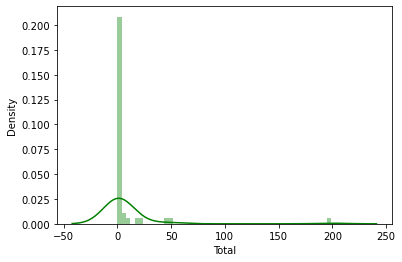

In [23]:
# 安徽省2017年行业碳排放分布

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats,integrate

x = CO2.loc[CO2.index != 'Total Final Consumption','Total']
sns.distplot(x, color = "g") 

plt.show()

C:\Users\cuiyl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cuiyl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\cuiyl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='Total'>

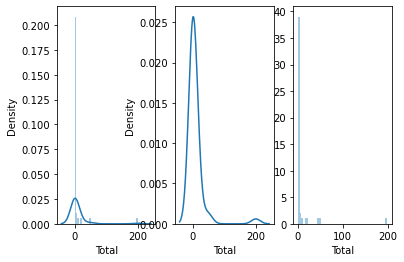

In [24]:
# 通过hist和kde参数调节是否显示直方图及核密度估计(默认hist,kde均为True)

fig,axes = plt.subplots(1,3)
sns.distplot(x,ax = axes[0])                #左图 默认 参数ax= 把图形放在哪个框里
sns.distplot(x,hist = False ,ax = axes[1]) #中图 隐藏直方图 hist=False
sns.distplot(x,kde = False, ax = axes[2])  #右图 隐藏数据趋势kde，纵轴表示的是频数而不是频率

<AxesSubplot:xlabel='Total'>

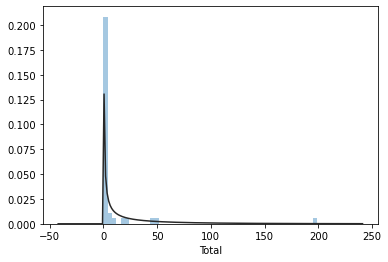

In [25]:
# 隐藏数据趋势kde，显示数据拟合度fit（如图中黑色曲线）
sns.distplot(x, kde=False, fit=stats.gamma)

#### 洛伦兹曲线

> 可以使用洛伦兹曲线来表示数据不平均的情况。洛伦兹曲线最初被用于表示收入的不平等参数，曲线上的每个点表示当前百分比的人数占据总财富的百分比比例。其中很著名的80-20理论说明的就是80%的人只占据总财富的20%，还有80%的财富被20%的人占有。

In [26]:
def lorenz_curve(X):
    X = np.array(sorted(X)) #数据从小到大排列
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) #为了绘制洛伦兹曲线我们需要添加0，0作为曲线起点。
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[5,5])
    ## 散点图
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,
               marker='x', color='darkgreen', s=2)
    #
    ax.plot([0,1], [0,1], color='k')

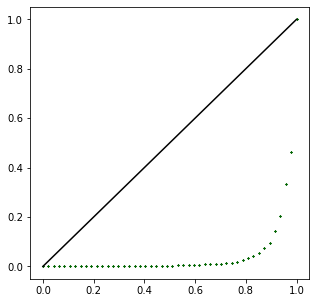

In [27]:
lorenz_curve(x)

<div style="background:#cfe2f3">

> 💡 从数据分布的分析可以看出，各个行业的碳排放有着明显不同，行业碳排放不均显著，90%的行业只占总碳排放的10%。
    
    
<div>

### 数据统计分析

#### 从消费部门看碳排放

**饼状图**

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import pandas as pd

CO2 = pd.read_excel('./result/CO2_Anhui_2017.xlsx',index_col=0)

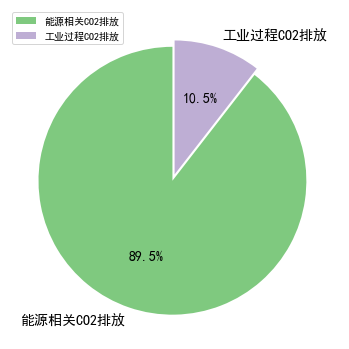

In [30]:
# 首先统计能源相关及过程相关碳排放分布

# 使图表元素中正常显示中文
mpl.rcParams['font.sans-serif'] = 'SimHei'

data = [ CO2.loc['Total Final Consumption','Total'] - CO2.loc['Total Final Consumption','Process'] ,CO2.loc['Total Final Consumption','Process']]

labels = ['能源相关CO2排放','工业过程CO2排放']
plt.figure(figsize = (6,9)) #调节图形大小
explode = [0.05,0] #某一块分割出来，值越大分割出的间隙越大
plt.pie(data,
        labels = labels,
        explode = explode,
        pctdistance = 0.6,
        startangle = 90,
        autopct = '%.1f%%',
        colors = plt.get_cmap('Accent')(range(2)), #colormap
        textprops={'fontsize': 14, 'color': 'k'}) 

plt.legend(loc='best')

<div style="background:#cfe2f3">

> 💡 由上图可以发现，安徽省能源行业碳排放占全社会碳排放总量近90%左右，要实现“碳达峰、碳中和”目标，核心是推动能源行业低碳转型。
    
<div>

**复合饼状图（子母图）**

下面来看一下能源相关CO2排放的结构构成。

In [31]:
# 首先统计大类行业部门，即“农、林、牧、渔业”、“工业”、“建筑业”、“交通运输、仓储和邮政业”、
#“批发、零售业和住宿、餐饮业”、“其他”、“城镇生活消费”及“乡村生活消费”。

#能源相关碳排放
CO2_energy = CO2.drop('Process', axis = 1) 
CO2_energy['Total'] = CO2_energy.iloc[:,0:-1].sum(axis = 1)

secs = ['Electric Power, Steam and Hot Water Production and Supply','Farming, Forestry, Animal Husbandry, Fishery & Water Conservancy',
        'Construction',
        'Transport, Storage, Postal & Telecommunications Services','Wholesale, Retail Trade and Catering Service',
        'Urban','Rural','Other']
labels = ['Power','Farming','Construction','Transport','Wholesale', 'Urban','Rural','Other']

#除电力行业外，其他工业部门排放
indus = CO2_energy.iloc[0,:] - CO2_energy.loc[secs,:].sum(axis = 0) 
CO2_sum = CO2_energy.loc[secs,:]
CO2_sum.index = labels
CO2_sum.loc['Other Industry'] = indus

# 其次统计细分工业部门排放构成
CO2_ins = CO2_energy.loc[~CO2_energy.index.isin(secs)]
CO2_ins.iloc[0,:] = CO2_ins.iloc[1:CO2_ins.shape[0]+1,:].sum(axis = 0)

C:\Users\cuiyl\anaconda3\lib\site-packages\pandas\core\indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [32]:
# 为展示方便，大行业部门只显示Top5
CO2_sum = CO2_sum.sort_values(by = 'Total', ascending=False) # 按照各部门碳排量由高至低排序
CO2_sum.iloc[5,:] = CO2_sum.iloc[5:CO2_sum.shape[0]+1,:].sum(axis = 0)
CO2_sum = CO2_sum.iloc[0:6,:]

# 为展示方便，细分工业部门只显示排放占比大于1%的
share = CO2_ins['Total']/CO2_ins.loc['Total Final Consumption','Total']
CO2_ins = CO2_ins.loc[ share > 0.01,:]
CO2_ins.iloc[0,:] = CO2_ins.iloc[0,:] - CO2_ins.iloc[1:CO2_ins.shape[0]+1,:].sum(axis = 0)
CO2_ins.rename({'Total Final Consumption':'Other'}, inplace=True)

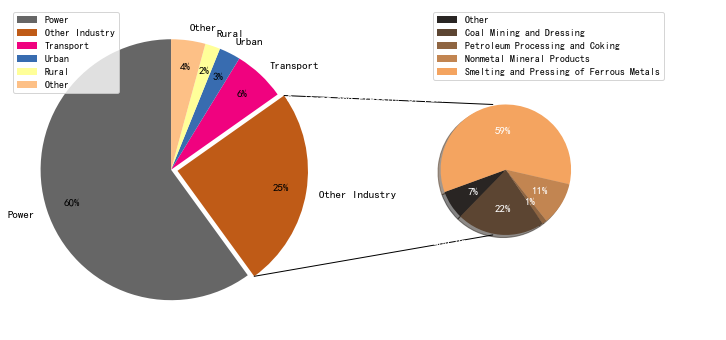

In [33]:
# 复合饼状图（子母图）
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import numpy as np

# 画布
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# 大饼图显示大类行业部门
explode = (0, 0.05, 0, 0, 0, 0)    # 分裂距离

ax1.pie(x=CO2_sum['Total'],
        explode=explode,
        autopct='%1.0f%%',
        pctdistance = 0.8, # 数据标签位置,解决因数据过小而导致的字体重叠
        startangle=90,
        labels=CO2_sum.index,
        colors = plt.get_cmap('Accent_r')(range(10)), #colormap
        textprops={'color': 'k','fontsize': 11},
        
       )

ax1.legend(loc = 'best')

# 小饼图显示细类工业部门

pal=sns.dark_palette(color='sandybrown',n_colors=CO2_ins.shape[0],) #利用seaborn库基于色系生成颜色，
                                                                    #此处选择与左图‘Other Industry’相近色系

ax2.pie(x=CO2_ins['Total'],
        colors = pal, 
        autopct='%1.0f%%',
        startangle=200,
        labels=CO2_ins.index,
        radius=0.5,# 控制饼图大小
        shadow=True,
        textprops={'color': 'w',
                   'fontsize': 11,
                  },
       )
ax2.legend(loc = 'best')

# 用 ConnectionPatch 画出两个饼图的间连线
## 饼图边缘的数据
theta1 = ax1.patches[1].theta1 # 其中，1表示左图中需要细分的类别索引，本例中‘Other Industry’在CO2_sum中的行索引号为1（第二行）
theta2 = ax1.patches[1].theta2
center = ax1.patches[1].center
r = ax1.patches[-1].r

width=0.2
# 上边缘的连线
x = r*np.cos(np.pi/180*theta2)+center[0]
y = np.sin(np.pi/180*theta2)+center[1]
con_a = ConnectionPatch(xyA=(-width/2,0.5), xyB=(x,y),
                        coordsA='data', coordsB='data',
                        axesA=ax2, axesB=ax1
                       )

# 下边缘的连线
x = r*np.cos(np.pi/180*theta1)+center[0]
y = np.sin(np.pi/180*theta1)+center[1]
con_b = ConnectionPatch(xyA=(-width/2,-0.5), xyB=(x,y),
                        coordsA='data', coordsB='data',
                        axesA=ax2, axesB=ax1
                       )

for con in [con_a, con_b]:
    con.set_linewidth(1)    # 连线宽度
    con.set_color=([0,0,0])    # 连线颜色
    ax2.add_artist(con)   # 添加连线

In [35]:
CO2 = pd.read_excel('./result/CO2_Anhui_2017.xlsx',index_col=0)
CO2 = CO2.sort_values(by = 'Total', ascending=False)
CO2['Share'] = CO2['Total']/CO2.loc['Total Final Consumption', 'Total']
CO2.iloc[0:10, :]

,Raw Coal,Cleaned Coal,Other Washed Coal,Briquettes,Coke,Coke Oven Gas,Other Gas,Other Coking Products,Crude Oil,Gasoline,Kerosene,Diesel Oil,Fuel Oil,LPG,Refinery Gas,Other Petroleum Products,Natural Gas,Process,Total,Share
Total Final Consumption,226.326849,0,5.015299,1.115082,30.166789,2.696797,14.774832,0.358753,0.030332,16.818546,0.470447,19.535304,0.723011,3.435494,0.619149,0,9.541779,38.922964,370.551426,1.000000
"Electric Power, Steam and Hot Water Production and Supply",193.210392,0,4.326669,0.000000,0.000000,0.771337,0.000000,0.000000,0.000000,0.000585,0.000000,0.027844,0.033267,0.000000,0.079190,0,0.542343,0.000000,198.991628,0.537015
Smelting and Pressing of Ferrous Metals,1.586149,0,0.176127,0.303307,29.650442,1.584181,14.517391,0.352715,0.000000,0.003805,0.000000,0.074561,0.005069,0.000000,0.009022,0,0.345717,0.000000,48.608485,0.131179
Nonmetal Mineral Products,7.990563,0,0.003299,0.001220,0.051203,0.000000,0.015494,0.000252,0.000000,0.006439,0.000000,0.429113,0.019644,0.000000,0.033413,0,0.259287,38.922964,47.732890,0.128816
"Transport, Storage, Postal & Telecommunications Services",0.324192,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.583422,0.462556,12.728592,0.322852,0.000000,0.000000,0,0.972328,0.000000,21.393943,0.057735
Coal Mining and Dressing,16.881069,0,0.505519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011414,0.000000,0.087555,0.017109,0.000000,0.029070,0,0.397574,0.000000,17.929311,0.048385
Urban,0.146589,0,0.000000,0.159761,0.000000,0.000000,0.000000,0.000000,0.000000,3.541070,0.000000,0.042385,0.000000,1.446458,0.000000,0,3.457166,0.000000,8.793429,0.023731
Rural,1.509630,0,0.000000,0.649377,0.000000,0.000000,0.000000,0.000000,0.000000,1.925799,0.000000,0.167066,0.000000,1.885717,0.000000,0,0.077786,0.000000,6.215377,0.016773
Other,0.835936,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.569683,0.000000,0.422306,0.000000,0.039449,0.000000,0,0.617968,0.000000,4.485343,0.012105
"Farming, Forestry, Animal Husbandry, Fishery & Water Conservancy",0.929191,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.590910,0.000000,2.339856,0.000000,0.000000,0.000000,0,0.000000,0.000000,3.859956,0.010417


<div style="background:#cfe2f3">

> 💡 从上图可以发现，安徽省“范围一”能源相关碳排放主要来自电力、热力生产和供应业（60%），工业（25%），交通（6%），上述三个部门碳排放占2017年安徽省能源相关碳排放总量的90%左右。

> 💡 工业细分部门中，能源相关碳排放主要来自黑色金属冶炼和压延加工业（如，钢铁）、煤炭开采和洗选业、非金属矿物制品业（如，水泥、玻璃等），占除电力外工业部门碳排放的比例分别为59%、22%、11%。

> 💡 综合能源相关及工业过程相关碳排放，总体来看，2017年安徽省碳排放主要来源依次为电力热力（53.7%）、黑色金属冶炼和压延加工业（13.1%）、非金属矿物制品业（12.9%）、交通（5.8%）、煤炭开采和洗选业（4.8%）。
    
<div>

#### 从燃料品种看碳排放

首先看一下全省整体，各燃料品种碳排放的占比情况。

In [36]:
data = CO2.loc['Total Final Consumption','Raw Coal':'Process']
data.sort_values(ascending = False, inplace = True)
data = pd.DataFrame(data)

# 仅显示TOP5
data.iloc[5,:] = data.iloc[5:data.shape[0]+1,:].sum(axis = 0)
data = data.iloc[0:6,:]
data.rename({data.index.to_list()[5]:'Other'}, inplace=True)

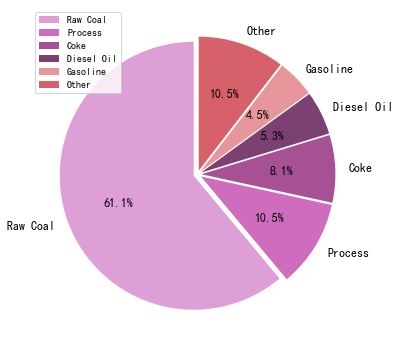

In [37]:
plt.figure(figsize = (6,9)) #调节图形大小
explode = 0.03+ np.zeros(data.shape[0]) #某一块分割出来，值越大分割出的间隙越大
plt.pie(data['Total Final Consumption'],
        labels = data.index,
        explode = explode,
        pctdistance = 0.6,
        startangle = 90,
        autopct = '%.1f%%',
        colors = plt.get_cmap('tab20b_r')(range(data.shape[0])), #colormap
        textprops={'fontsize': 12, 'color': 'k'}) 

plt.legend(loc='best')

<div style="background:#cfe2f3">

> 💡 该省份能源消费结构以煤炭为主，CO2排放主要来自于原煤的燃料，该部分排放占比61.1%，其次为工业过程排放占比10.5%、焦炭燃烧占比8.1%、柴油燃烧占比5.3%、汽油燃烧占比4.5%。
    
<div>

接下来看一下全省各行业中，各燃料品种碳排放的占比情况。

**堆积条形图**

<AxesSubplot:>

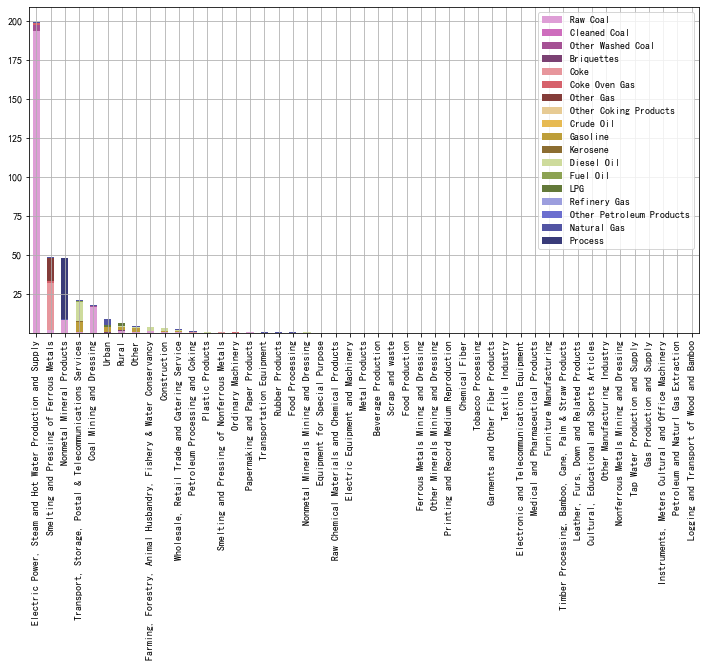

In [38]:
data = CO2.iloc[1:CO2.shape[0]+1,:]

data.loc[:,'Raw Coal':'Process'].plot(kind = 'bar', grid = True, colormap = 'tab20b_r', stacked = True, figsize = (12,6))

#### 各省份碳排横向比较

> 中国哪些省份CO2排放量最大？

这里我们使用[CEADs分部门核算碳排放清单](https://www.ceads.net.cn/data/province/by_sectoral_accounting/)上公开的各省1997-2018年碳排放数据，稍作整理汇总。

**条形图**

In [39]:
# 读取各省碳排放数据（单位：百万吨）
import pandas as pd

CO2_all = pd.read_excel('./data/Province CO2 emissions 1997-2018.xlsx') 
CO2_all.drop(0, inplace = True)

In [40]:
# 数据类型转换
CO2_all[CO2_all.columns[2:]] = CO2_all[CO2_all.columns[2:]].astype('float')

In [ ]:
CO2_all.dtypes

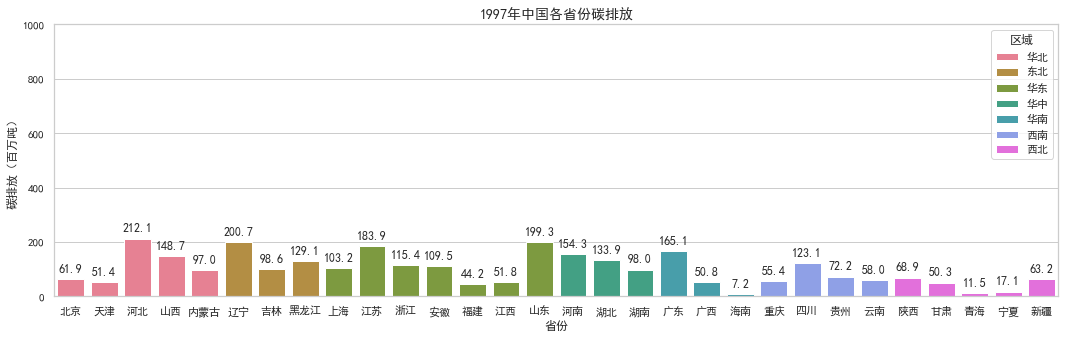

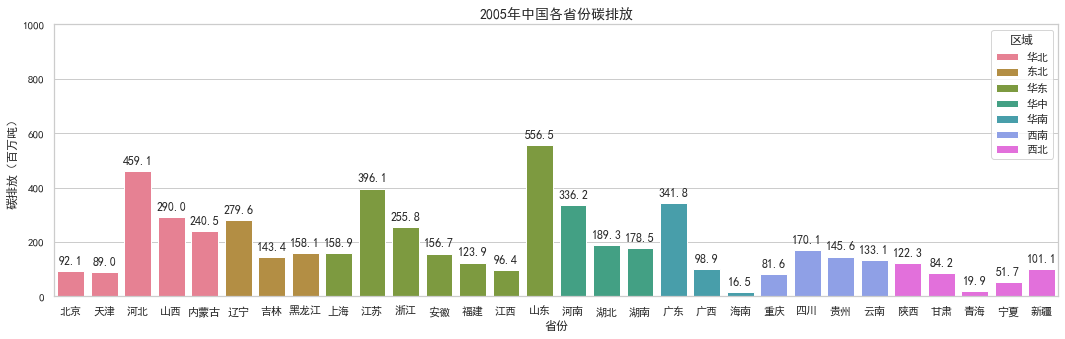

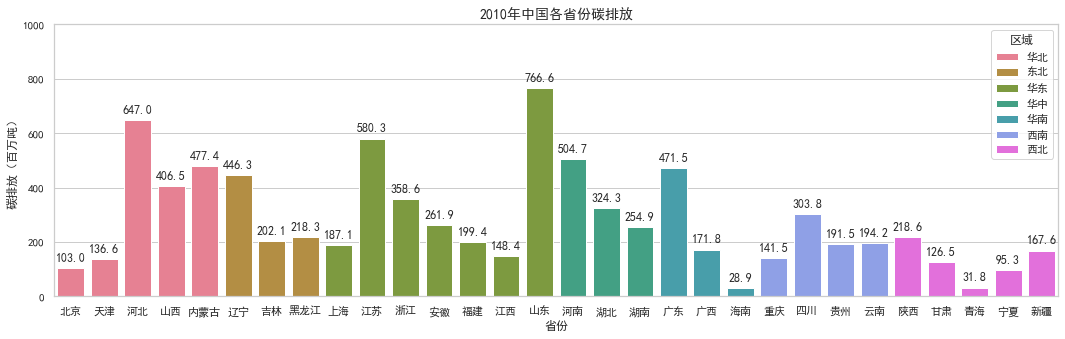

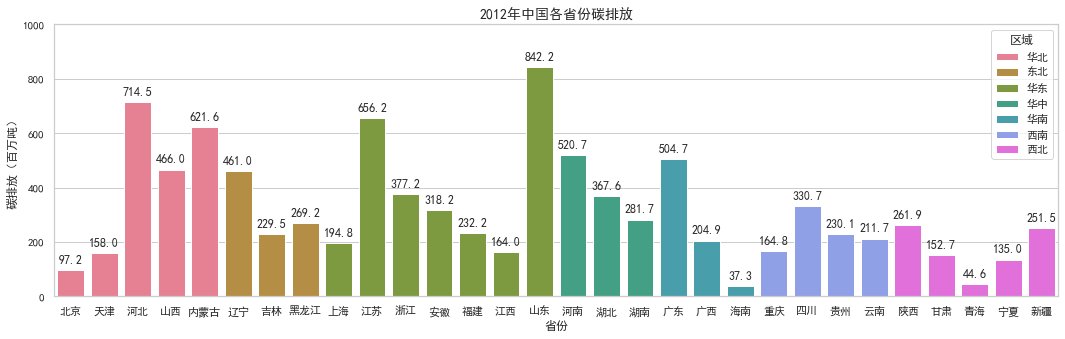

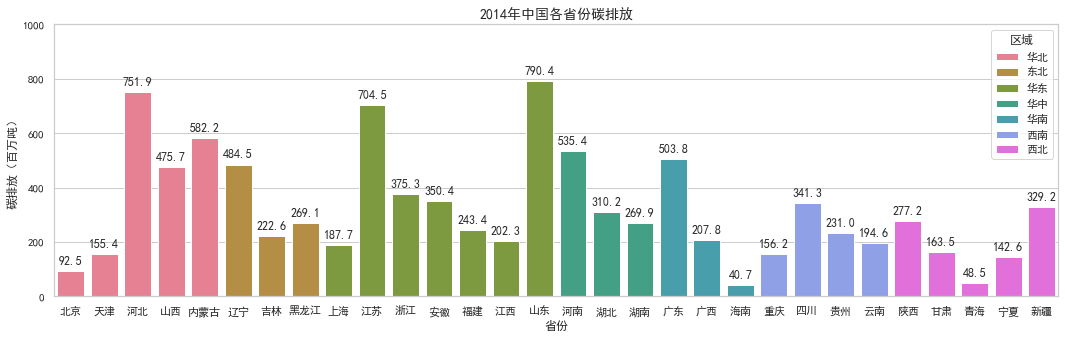

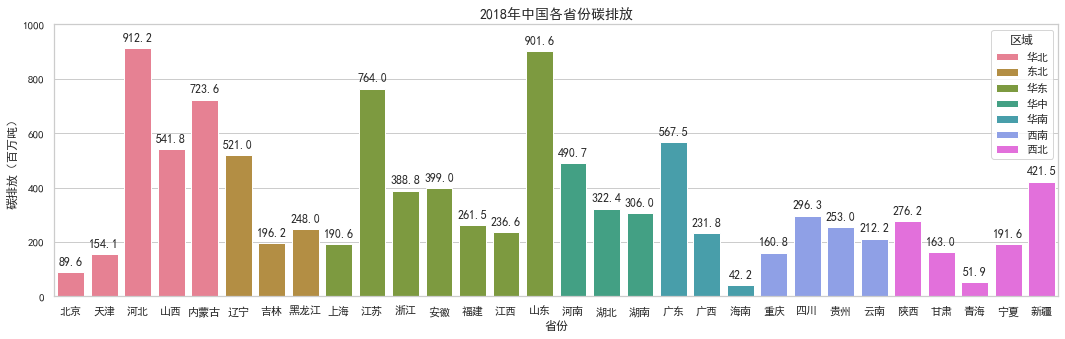

In [42]:
# 选取1997,2005,2010,2012,2014,2018几个年份进行分析

# 使用seaborn.barplot绘制
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = "whitegrid")
# 处理中文问题
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

def show_value_for_barplot(barplot, h_v="v"):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
def plot_bar(yr):
    
    fig = plt.figure(figsize=(18,5))
    plt.ylim(0, 1000) #设置纵坐标范围，方便不同年份间比较
    #Use hue without changing bar position or width:
    splot = sns.barplot(x = "省份", y = yr, data = CO2_all, hue = "区域", palette="husl", dodge=False) 
    show_value_for_barplot(splot)
    plt.ylabel("碳排放（百万吨）") 
    plt.title(str(yr)+"年中国各省份碳排放", size = 14)
    plt.show()


for yr in [1997,2005,2010,2012,2014,2018]:
    plot_bar(yr)

用Python画中国地图，实现各省份碳排放数据可视化

> 内容简介：pyecharts是一款将python与echarts结合的强大的数据可视化工具。🏆🏆官方文档：https://pyecharts.org/#/zh-cn/intro

In [ ]:
!pip install pyecharts

In [45]:
from pyecharts import Map

In [46]:
chinaMap = Map(width=1200, height=600) 
chinaMap.add(name="碳排放量（Mt）", 
             attr=CO2_all["省份"], 
             value=CO2_all[2018], 
             visual_range=[min(CO2_all[2018]), max(CO2_all[2018])], 
             maptype='china', 
             is_visualmap=True,
             is_label_show=True) 
chinaMap.render(path="./result/2018年中国各省份碳排放分布地图.html") 

#其中参数name指的是显示在地图正上方的标题，
#attr就是一个包含了各省份名称的列表，
#value就是包含了各省份对应数值的列表，
#visual_range指的是整个数据中的数值范围，
#maptype就是指的地图类型，
#is_visualmap代表是否显示颜色

以上方法生成的地图中，各省份的名称只有在被鼠标选中的情况下，才能显示，并且所保存的图片也不会显示各省份名称，如果要显示各省份名称，则需要对 html 文件就行修改，推荐使用notepad++(一个文本编辑软件，直接去百度上下载，很简单的)打开地图文件，然后在第1923行的那个series中添加"label":{ "normal":{ "show":true}}并保存，如下：

![image.png](./img/map.png)

效果展示：

![image.png](./img/co2.png)

<div style="background:#cfe2f3">

> 💡 从上图可以发现，过去20年中国各省的二氧化碳排放量都发生了明显的增长，主要集中在华北地区和华东地区。高排放省份排名几乎没有变化。
    
<div>

具体到排名前十的大排放省份，下面显示山东、河北、江苏、广东、内蒙古、河南、山西、辽宁、浙江、四川省，1997-2018年间二氧化碳排放的变化情况。

**折线图**

In [47]:
CO2_all2 = pd.DataFrame(CO2_all.values.T, columns = CO2_all["省份"], index = CO2_all.columns)
CO2_all2.drop(index = ['区域','省份'], inplace = True)

In [48]:
CO2_all2 = CO2_all2.astype('float')

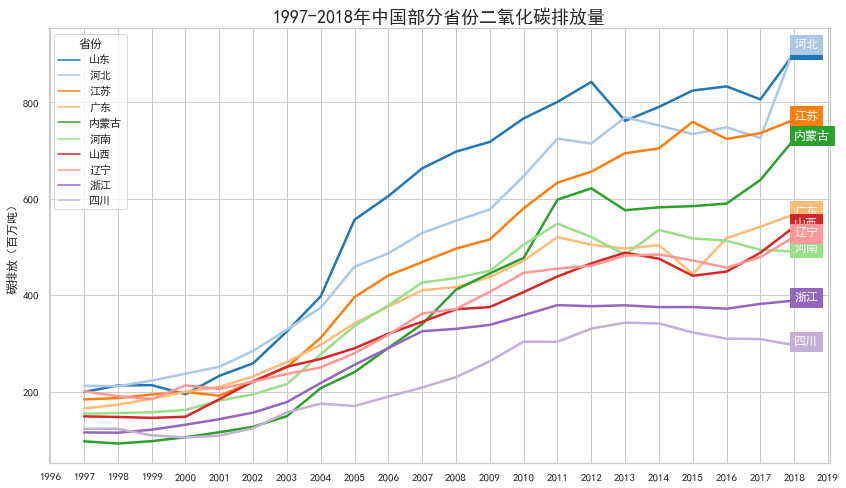

In [49]:
# 使用seaborn.lineplot绘制
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

fig = plt.figure(figsize=(14,8))
sns.set_theme(style = "whitegrid")
ax = plt.gca()

#修改坐标轴刻度间隔

#把x轴的主刻度设置为1的倍数
ax.xaxis.set_major_locator(MultipleLocator(1))


# 处理中文问题
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

list_p = ['山东','河北','江苏','广东','内蒙古','河南','山西','辽宁','浙江','四川']

data = CO2_all2[list_p]
colors=sns.color_palette("tab20")

sns.lineplot( data = data,
            palette="tab20", linewidth=2.5, dashes=False)
for y,l,c in zip(data.loc[2018],list_p,colors[:10]):
    plt.text(x=2018,y = y, s = l,color = "w").set_backgroundcolor(c)
    
plt.ylabel("碳排放（百万吨）") 
plt.title("1997-2018年中国部分省份二氧化碳排放量", size = 18)
    
plt.show()


<div style="background:#cfe2f3"> 
    
> 💡 总体上，1997-2018年间，各省能源及工业过程相关二氧化碳排放量持续不断上升，特别是在2000年至2011年间，各省二氧化碳排放量高速增长，在2011年后，排放增长率开始逐步放缓。
    
> 💡 与大多数研究一致，我国的碳排放在2011年前保持高速增长，而在2011年后逐步放缓，这是因为我国在2011年后相继出台碳减排政策，建立碳减排试点城市，使我国的碳排量得到控制。
    
> 💡 各省二氧化碳排放量差距较大，山东、河北、江苏、内蒙古四个省份排放量最高。
    
<div>

碳排放强度（即，单位GDP碳排放量）可以体现出我国在技术、管理以及产业等方面的节能情况。

In [50]:
# 读取GDP数据(单位：亿元)

GDP = pd.read_excel('./data/Province socioeconomic factors.xlsx', sheet_name = "GDP") 
GDP.drop(0, inplace = True)
GDP.set_index("省份", inplace = True)
GDP = GDP.astype('float')

GDP2 = pd.DataFrame(GDP[GDP.columns[:-2]].values.T, columns = GDP.index, index = GDP.columns[:-2])

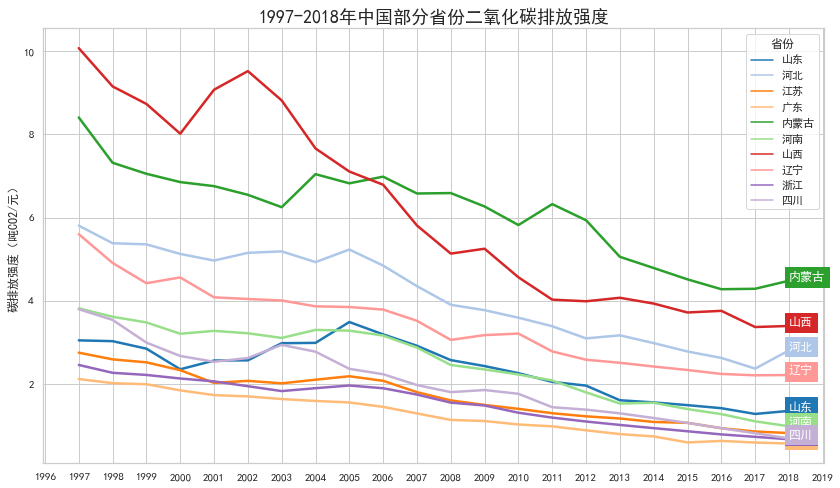

In [51]:
# 使用seaborn.lineplot绘制

fig = plt.figure(figsize=(14,8))
sns.set_theme(style = "whitegrid")
ax = plt.gca()

#修改坐标轴刻度间隔

#把x轴的主刻度设置为1的倍数
ax.xaxis.set_major_locator(MultipleLocator(1))


# 处理中文问题
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

list_p = ['山东','河北','江苏','广东','内蒙古','河南','山西','辽宁','浙江','四川']

data = CO2_all2[list_p]/GDP2[list_p] * 100
colors=sns.color_palette("tab20")

sns.lineplot( data = data,
            palette="tab20", linewidth=2.5, dashes=False)
for y,l,c in zip(data.loc[2018],list_p,colors[:10]):
    plt.text(x=2018,y = y, s = l,color = "w").set_backgroundcolor(c)
    
plt.ylabel("碳排放强度（吨CO2/元）") 
plt.title("1997-2018年中国部分省份二氧化碳排放强度", size = 18)
    
plt.show()

<div style="background:#cfe2f3"> 
    
> 💡 由图可以发现，虽然中国高排放省份二氧化碳排放量一直在快速增加，但碳排放强度则呈现出稳步下降的趋势。
    
> 💡 各省碳排放强度也存在明显差异。
   
<div>

#### 碳排放的社会经济特征

在关于碳排放影响因素的已有研究中，多数学者研究显示：影响碳排放的因素主要与经济、人口、能源、城镇化等有关。根据已有研究，人口、人均GDP、城镇化率、能源强度和单位能源碳排放5个因素广泛应用于碳排放相关研究中，并且均能显著影响碳排放。

以下选取，人口、GDP两个指标做示例分析。

In [52]:
# 读取人口数据(万人)
pop = pd.read_excel('./data/Province socioeconomic factors.xlsx', sheet_name = "人口") 
pop.drop(0, inplace = True)
pop.set_index("省份", inplace = True)
pop = pop.astype('float')

In [54]:
# 读取GDP数据(单位：亿元)
GDP = pd.read_excel('./data/Province socioeconomic factors.xlsx', sheet_name = "GDP") 
GDP.drop(0, inplace = True)
GDP.set_index("省份", inplace = True)
GDP = GDP.astype('float')

Seaborn 联合分布jointplot( )

In [55]:
import seaborn as sns
from scipy.stats import stats

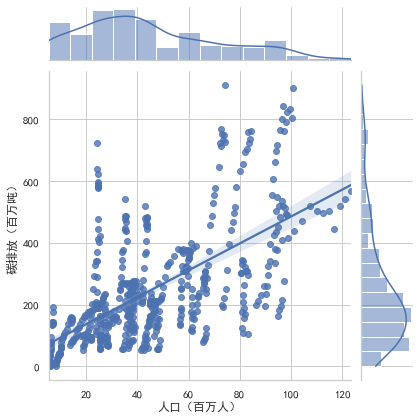

In [56]:
# 碳排放与人口关系
# 使用2000-2018年各省碳排放及人口数据绘制,下图中一个数据点表示某省某年的数据

CO2_pop = {'人口（百万人）':pop[pop.columns[:-2]].values.flatten()/100,'碳排放（百万吨）':CO2_all[CO2_all.columns[5:]].values.flatten()}
CO2_pop = pd.DataFrame(CO2_pop)

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
sns.jointplot(x = "人口（百万人）",y = "碳排放（百万吨）", data = CO2_pop, kind = 'reg')
plt.show()

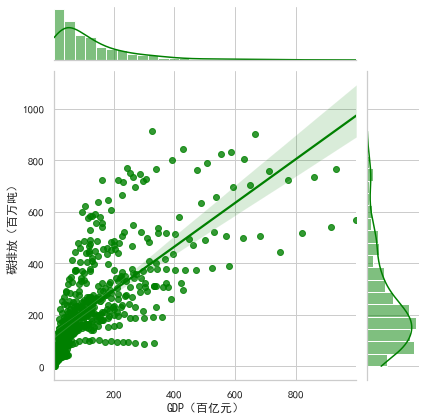

In [57]:
# 碳排放与地区生产总值（GDP）关系
# 使用2000-2018年各省碳排放及GDP数据绘制,下图中一个数据点表示某省某年的数据

CO2_GDP = {'GDP（百亿元）':GDP[GDP.columns[3:-2]].values.flatten()/100,'碳排放（百万吨）':CO2_all[CO2_all.columns[5:]].values.flatten()}
CO2_GDP = pd.DataFrame(CO2_GDP)

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
sns.jointplot(x = "GDP（百亿元）",y = "碳排放（百万吨）", data = CO2_GDP, kind = 'reg', color = 'green')
plt.show()

按照人均GDP（衡量经济发展水平）、人均碳排放（衡量排放水平）和单位GDP碳排放（衡量能源经济效率）情况，看看各省发展模式。

下面散点图中，横轴为人均GDP, 纵轴和颜色表示单位GDP碳排放，散点大小表示碳排放量。

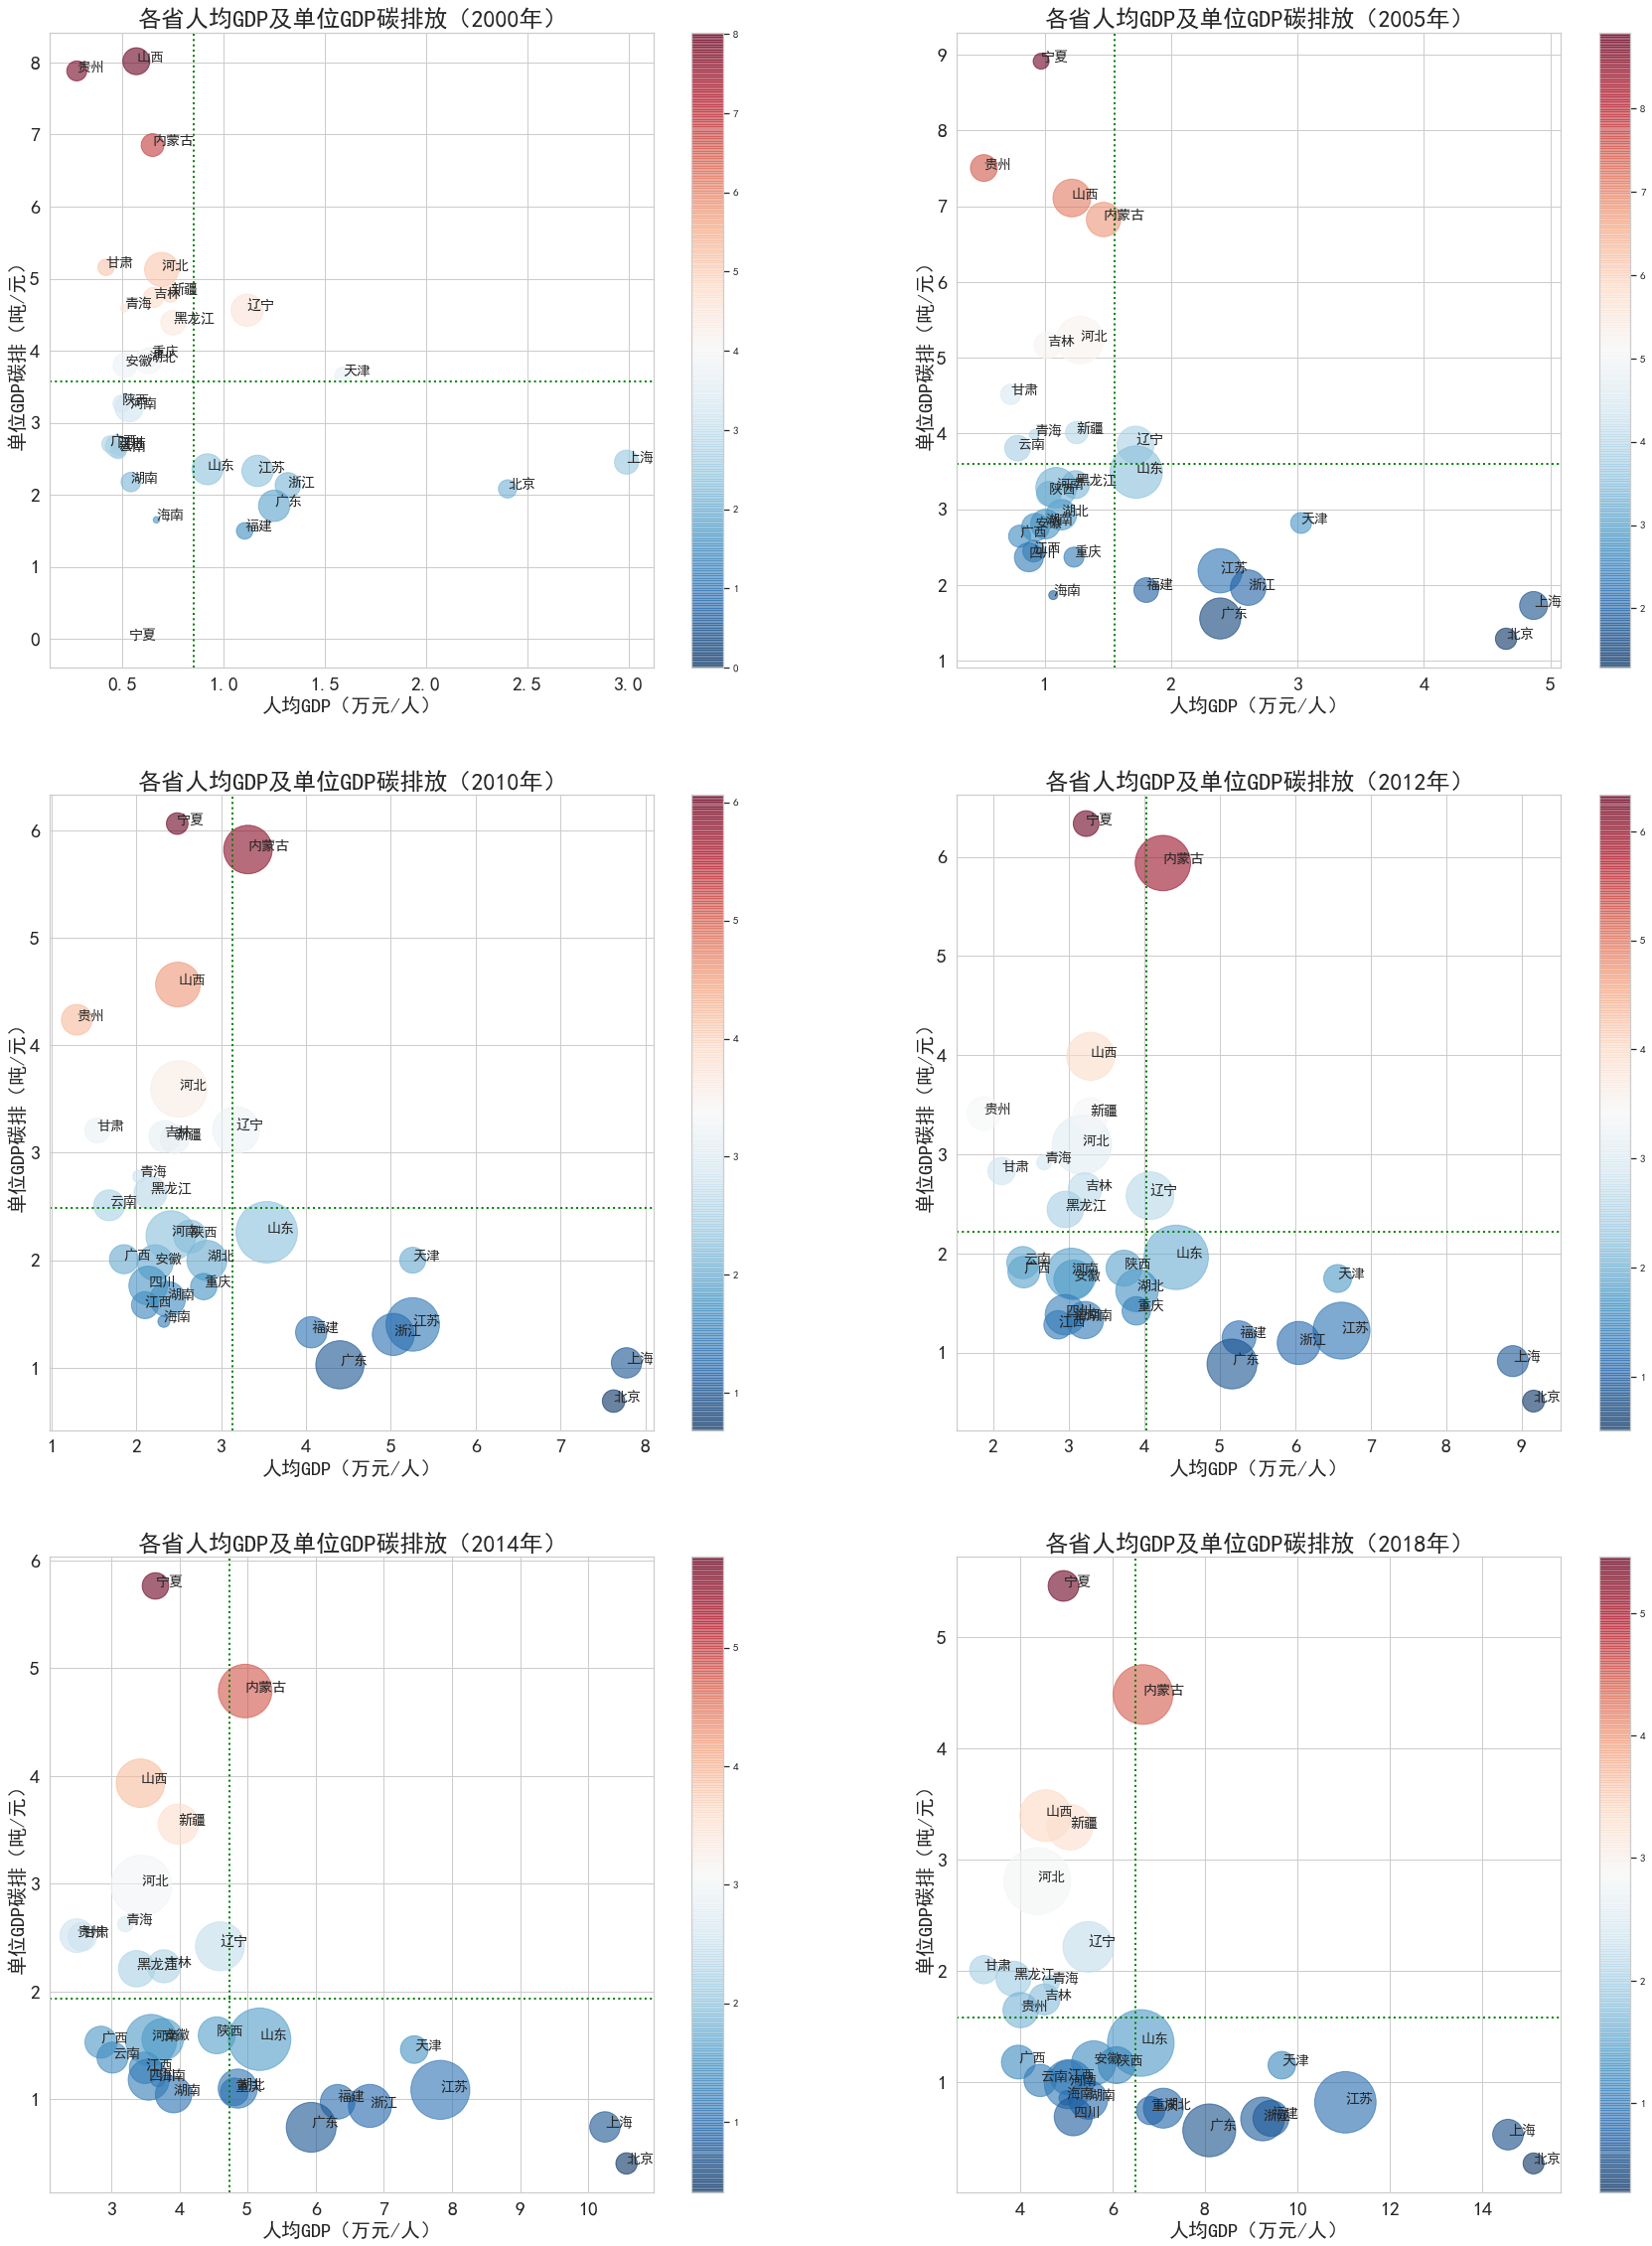

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize = (30,40))

#选取2000,2005,2010,2012,2014,2018几个年份进行分析

yr_list = [2000, 2005, 2010, 2012, 2014, 2018]
p = CO2_all['省份'].values

for l, yr in enumerate(yr_list):

    ax=fig.add_subplot(3,2,l+1)
    x = GDP[yr].values/pop[yr].values # 人均GDP,万元/人
    y = CO2_all[yr].values/GDP[yr].values*100 # 单位GDP碳排放，吨/元
    z = CO2_all[yr].values

    mappable=ax.scatter(x,y,c=y,s=5*z,alpha=0.6,cmap=plt.cm.RdBu_r) 

    for i in range(0, len(x)):
            ax.text(x[i],y[i], p[i], size = 14)
        
    plt.axhline(y=np.mean(y),ls=":",c="green", lw = 2)#添加水平直线
    plt.axvline(x=np.mean(x),ls=":",c="green", lw = 2)#添加垂直直线
        
    plt.xlabel("人均GDP（万元/人）", fontsize = 20)
    plt.ylabel("单位GDP碳排（吨/元）",fontsize = 20)
    plt.title('各省人均GDP及单位GDP碳排放（'+str(yr) + '年）', size = 24)
    # 添加颜色条
    cb=plt.colorbar(mappable=mappable,ax=ax)
    plt.tick_params(labelsize=20) #刻度字体大小20

<div style="background:#cfe2f3">

💡 从各省碳排放强度和能源经济效率分布情况来看，我们各省发展模式可以大致归为三大类：

* <span class="burk"><span class="girk">东部沿海发达地区</span></span>：北京、上海、天津、江苏、浙江、福建、广东和山东等8个省份。这些地区经历了经济快速增长，人均GDP高于全国平均水平；低碳发展水平在全国处于较前列，单位GDP碳排放强度低于全国平均水平。

* <span class="burk">西北部高碳地区</span>：包括宁夏、内蒙古、山西、新疆、河北、辽宁等6个省份。这些地区是能源基地、能源化工基地，或以高耗能产业为主，人均GDP低于全国平均水平，单位GDP碳排放普遍远远高于全国平均水平，且全省全年碳排放总量较高。值得注意的是，在西北部地区中，贵州省2000-2018年，碳排放强度发生了非常明显的持续下降。

* <span class="mark">其他地区</span>：其余各省份，总体上人均GDP和单位GDP碳排放均处于中等或偏下水平。
    
<div>